In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt
import random


In [2]:
# Inputs and Parameters
def ask_for_input():
    T = float(input('Please enter time to maturity:'))
    r = float(input('Please enter a rate:'))
    d = float(input('Please enter dividend rate:'))
    K = float(input('Please enter strike:'))
    S = float(input('Please enter spot price:'))
    sigma = float(input('Please enter volatility:'))
    return T, r, d, K, S, sigma

In [3]:
# Price of Forward function
def get_forward():
    T, r, d, K, S, sigma = ask_for_input()
    forward = np.exp(-r*T)*((np.exp((r-d)*T)*S)-K)
    print(forward)
    return forward


In [4]:
# Price of Call Option function
def get_call():
    T, r, d, K, S, sigma = ask_for_input()
    if K==0 or T==0 or sigma ==0:
        print('Not a valid input')
    elif d == 0:
        d1 = (np.log(S/K)+(r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
        d2 = d1-sigma*np.sqrt(T)

        call = S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
        print(call)
        return call
    elif d < 0:
        print('Not a valid dividend input')
    else:
        d1 = (np.log(S/K)+(r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
        d2 = d1-sigma*np.sqrt(T)

        call = np.exp(-d*T)*S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
        print(call)
        return(call)
   

In [5]:
# Price of Put Option
def get_put():
    T, r, d, K, S, sigma = ask_for_input()
    if K==0 or T==0 or sigma ==0:
        print('Not a valid input')
    elif d == 0:
        d1 = (np.log(S/K)+(r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
        d2 = d1-sigma*np.sqrt(T)

        put = K*np.exp(-r*T)*norm.cdf(-1*d2) - S*norm.cdf(-1*d1)
        print(put)
        return put
    elif d < 0:
        print('Not a valid dividend input')
    else:
        d1 = (np.log(S/K)+(r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
        d2 = d1-sigma*np.sqrt(T)

        put = K*np.exp(-r*T)*norm.cdf(-1*d2) - np.exp(-d*T)*S*norm.cdf(-1*d1)
        print(put)
        return put

In [6]:
# Pricing of Digital Call
def get_dig_call():
    T, r, d, K, S, sigma = ask_for_input()
    if K==0 or T==0 or sigma ==0:
        print('Not a valid input')
    else:
        d1 = (np.log(S/K)+(r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
        d2 = d1-sigma*np.sqrt(T)
        dig_call = np.exp(-r*T)*norm.cdf(d2)
        print(dig_call)
        return dig_call



In [7]:
# Pricing of Digital Put
def get_dig_put():
    T, r, d, K, S, sigma = ask_for_input()
    if K==0 or T==0 or sigma ==0:
        print('Not a valid input')
    else:
        d1 = (np.log(S/K)+(r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
        d2 = d1-sigma*np.sqrt(T)
        dig_put = np.exp(-r*T)*norm.cdf(-d2)
        print(dig_put)
        return dig_put

In [8]:
# Pricing a zero coupon bond
def get_zero_coupon_bond():
    T, r, d, K, S, sigma = ask_for_input()
    zero_coup_bond = 1/(np.exp(r*T))
    print(zero_coup_bond)
    return (zero_coup_bond)



In [ ]:
# Consistency checks (i)
# put-call parity (call - put - forward
f = get_forward()
c = get_call()
p= get_put()
if p-c==f:
    print('yes')
else:
    print('Soph messed up the code')

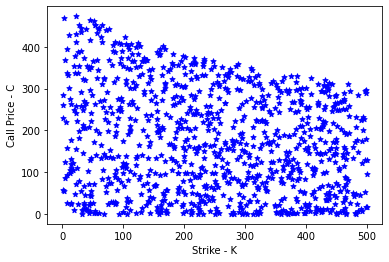

In [28]:
# Consistency check (ii)
# decreasing monotonicity of call price with strike graphically 
# Pick a large data set (line 9)
# Some outliers will occur, but general shape of graph shows decreasing montonicity
x=1
data = []

# Make a list of randomly generated parameters and call price

for x in range(1,1000):
    T = 10
    r= 0.02
    d= 0
    K= np.random.uniform(0,500)
    S = np.random.uniform(0,500)
    sigma = 0.5
    
    data.append(T)
    data.append(r)
    data.append(d)
    data.append(K)
    data.append(S)
    data.append(sigma)
#   Calculate price of call option and add to data list
    if K==0 or T==0 or sigma ==0:
        print('Not a valid input')
        continue
    elif d == 0:
        d1 = (np.log(S/K)+(r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
        d2 = d1-sigma*np.sqrt(T)
        call = S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    elif d < 0:
        continue
    else:
        d1 = (np.log(S/K)+(r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
        d2 = d1-sigma*np.sqrt(T)

        call = np.exp(-d*T)*S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    if call<=0:
        continue
    else: data.append(call)
            
    x=x+1

    
# List for K values and call price
K_list = []
call_list = []
y=0
for y in range(0,int(len(data)/7)):
    K_list.append(data[3+7*y])
    call_list.append(data[6+7*y])


# organise k and call lists into 2 dimensional K ascending array

K_array = np.array(K_list)
call_array = np.array(call_list)
K_call_array = np.array((K_array,call_array)).T
K_call_array = K_call_array[np.argsort(K_call_array[:, 0])]



#Plot strike against call price to visually see monotone decreasing nature of graph
i=0
for i in range(0,len(K_list)):
    x1=[K_list[i]]
    y1= [call_list[i]]
    plt.scatter(x1,y1, label = "stars", color= "blue", marker = "*", s = 30)

plt.xlabel('Strike - K')
plt.ylabel('Call Price - C')
plt.show()

In [ ]:
# Check monotonicity analytically

# #Check for call option price monotonically decreasing with K
# def get_monotonicity([][])
# a = [][]
# For i in range(0, len(K_list)):
#     if K_call_array[i+1][1] 

In [10]:
# Ask for inputs return as a list
def get_input_list():
    T = float(input('Please enter time to maturity:'))
    r = float(input('Please enter a rate:'))
    d = float(input('Please enter dividend rate:'))
    K = float(input('Please enter strike:'))
    S = float(input('Please enter spot price:'))
    sigma = float(input('Please enter volatility:'))
    list = [T, r, d, K, S, sigma]
    return list

In [ ]:
# Consistency checks (iii)
# call price should be between S and S-Ke^(-rT)
# Unpack list of inputs 

parameters = get_input_list()
T =parameters[0]
r=parameters[1]
d=parameters[2]
K=parameters[3]
S = parameters[4]
sigma = parameters[5]

if K==0 or T==0 or sigma ==0:
    print('Not a valid input')
elif d == 0:
    d1 = (np.log(S/K)+(r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)

    call = S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    
elif d < 0:
    print('Not a valid dividend input')
else:
    d1 = (np.log(S/K)+(r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)

    call = np.exp(-d*T)*S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    
if  S-K*np.exp(-r*T)<call< S:
    print(' The code works')
else:
    print('Soph mess up the code')
    print (S-K*np.exp(-r*T))
    print(S)
    print(S-K*np.exp(-r*T),'<', call, '<',S)
    


In [ ]:
# Consistency check (iv)
# decreasing monotonicity of call price with vol graphically 
# set data set to be large enough to observe pattern
# Recommend choosing constant time, r, d and a limited K, S to get not too noisy graph

x=1
sigma_list=[]
call_list=[]
# Make a list of randomly generated parameters and call price

for x in range(1,100):
    T = 1
    r= 0.02
    d= 0
    K=np.random.uniform(40,50)
    S = np.random.uniform(35,60)
    sigma = np.random.uniform(0,3)
    sigma_list.append(sigma)
#   Calculate price of call option and add to data list
    d1 = (np.log(S/K)+(r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    call = np.exp(-d*T)*S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    if call<=0:
        continue
    else: call_list.append(call)
    x=x+1


#Plot strike against call price to visually see monotone decreasing nature of graph
i=0
for i in range(0,len(call_list)):
    x1=[sigma_list[i]]
    y1= [call_list[i]]
    plt.scatter(x1,y1, label = "stars", color= "blue", marker = "*", s = 30)

plt.xlabel('Volatility')
plt.ylabel('Call Price - C')
plt.show()




In [ ]:
#Consistency check (v)
# d = 0 call option increasing with T
# Choose range of paramters carfully to avoid too much noise
x=1
call_list=[]
time_list=[]
# Make a list of randomly generated parameters and call price

for x in range(1,900):
    T = np.random.uniform(0,10)
    r= 0.02
    d= 0
    K=np.random.uniform(40,50)
    S = np.random.uniform(35,60)
    sigma = 0.3
    time_list.append(T)
#   Calculate price of call option and add to data list
    d1 = (np.log(S/K)+(r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    call = np.exp(-d*T)*S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    if call<=0:
        continue
    else: call_list.append(call)
    x=x+1

# # organise k and call lists into 2 dimensional K ascending array

# sigma_array = np.array(sigma_list)
# call_array = np.array(call_list)
# sigma_call_array = np.array((sigma_array,call_array)).T
# sigma_call_array = sigma_call_array[np.argsort(sigma_call_array[:, 0])]
# print(sigma_call_array)


#Plot strike against call price to visually see monotone decreasing nature of graph
i=0
for i in range(0,len(call_list)):
    x1=[time_list[i]]
    y1= [call_list[i]]
    plt.scatter(x1,y1, label = "stars", color= "blue", marker = "*", s = 30)

plt.xlabel('Time - T')
plt.ylabel('Call Price - C')
plt.show()




In [ ]:
def get_theta(T,r,d,K,S,sigma):
    d1 = (np.log(S/K)+(r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    theta = S*np.exp(-r*T)*r*norm.cdf(d1)-K*np.exp(-r*T)*r*norm.cdf(d2)-S*np.exp(-r*T)(sigma/(2*np.sqrt(T)))*norm.pdf(d1)
    return theta


In [ ]:
#Consistency check (vi)
# convexity of call price with respect to strike
T_list = [1,1,1,1,1,1,1,1,1,1]
r_list = [0,0,0,0,0,0,0,0,0,0]
d_list = [0,0,0,0,0,0,0,0,0,0]
K_list = [5,10,15,20,25,30,35,40,45,50]
S_list = []
sigma_list=[0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
call_list = []
for y in range(0,9):
    S = np.random.uniform(40,50)
    S_list.append(S)
    y=y+1
    
for i in range(0,9):
    T = T_list[i]
    r = r_list[i]
    d = d_list[i]
    K = K_list[i]
    S = S_list[i]
    sigma = sigma_list[i]
    d1 = (np.log(S/K)+(r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    call = np.exp(-d*T)*S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    call_list.append(call)
print(call_list)


for j in range (0,9):
    x1=[K_list[j]]
    y1= [call_list[j]]
    plt.scatter(x1,y1, label = "stars", color= "blue", marker = "*", s = 30)
    j=j+1

plt.xlabel('Strike - K')
plt.ylabel('Call Price - C')
plt.show()

    
    

In [ ]:
#Consistency check (vii)
# Call spread aprox price of a dig call
print('Please enter data for a long call with lower strike')
a = get_call()

print('Please enter data for a short call with higher strike')
b = get_call()

print('Please enter same data as above')
c= get_dig_call()
print('Call spread:', a-b,'Digital Call:', c)



In [13]:
# Consistency check (viii)
# zero coupon bond is aprox = to dig call + dig put
parameters = get_input_list()
T =parameters[0]
r=parameters[1]
d=parameters[2]
K=parameters[3]
S = parameters[4]
sigma = parameters[5]

#dig call
if K==0 or T==0 or sigma ==0:
        print('Not a valid input')
else:
    d1 = (np.log(S/K)+(r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    dig_call = np.exp(-r*T)*norm.cdf(d2)

#dig put
if K==0 or T==0 or sigma ==0:
    print('Not a valid input')
else:
    d1 = (np.log(S/K)+(r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    dig_put = np.exp(-r*T)*norm.cdf(-d2)

# zero coup
zero_coup_bond = 1/(np.exp(r*T))

if dig_call + dig_put == zero_coup_bond:
    print('Nice!')
else:
    print('Soph messed up code')






Please enter time to maturity:1
Please enter a rate:0
Please enter dividend rate:0
Please enter strike:100
Please enter spot price:90
Please enter volatility:0.4
Nice!


In [26]:
%history


import pandas as pd
import numpy as np
import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt
import random
# Inputs and Parameters
def ask_for_input():
    T = float(input('Please enter time to maturity:'))
    r = float(input('Please enter a rate:'))
    d = float(input('Please enter dividend rate:'))
    K = float(input('Please enter strike:'))
    S = float(input('Please enter spot price:'))
    sigma = float(input('Please enter volatility:'))
    return T, r, d, K, S, sigma
# Price of Forward function
def get_forward():
    T, r, d, K, S, sigma = ask_for_input()
    forward = np.exp(-r*T)*((np.exp((r-d)*T)*S)-K)
    print(forward)
    return forward
# Price of Call Option function
def get_call():
    T, r, d, K, S, sigma = ask_for_input()
    if K==0 or T==0 or sigma ==0:
        print('Not a valid input')
    elif d == 0:
        d1 = (np.log(S/K)+(r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
        d2 = d1-sigma*np.sqrt(T)

        call = S*norm.cdf(d1) - K*np.exp

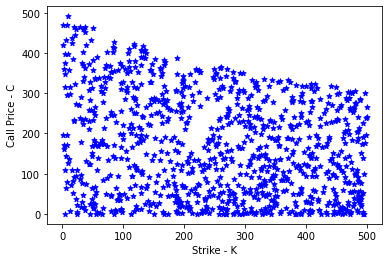

In [27]:
# Consistency check (ii)
# decreasing monotonicity of call price with strike graphically 
# Pick a large data set (line 9)
# Some outliers will occur, but general shape of graph shows decreasing montonicity
x=1
data = []

# Make a list of randomly generated parameters and call price

for x in range(1,1000):
    T = 10
    r= 0.02
    d= 0
    K= np.random.uniform(0,500)
    S = np.random.uniform(0,500)
    sigma = 0.5
    
    data.append(T)
    data.append(r)
    data.append(d)
    data.append(K)
    data.append(S)
    data.append(sigma)
#   Calculate price of call option and add to data list
    if K==0 or T==0 or sigma ==0:
        print('Not a valid input')
        continue
    elif d == 0:
        d1 = (np.log(S/K)+(r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
        d2 = d1-sigma*np.sqrt(T)
        call = S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    elif d < 0:
        continue
    else:
        d1 = (np.log(S/K)+(r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
        d2 = d1-sigma*np.sqrt(T)

        call = np.exp(-d*T)*S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    if call<=0:
        continue
    else: data.append(call)
            
    x=x+1

    
# List for K values and call price
K_list = []
call_list = []
y=0
for y in range(0,int(len(data)/7)):
    K_list.append(data[3+7*y])
    call_list.append(data[6+7*y])


# organise k and call lists into 2 dimensional K ascending array

K_array = np.array(K_list)
call_array = np.array(call_list)
K_call_array = np.array((K_array,call_array)).T
K_call_array = K_call_array[np.argsort(K_call_array[:, 0])]



#Plot strike against call price to visually see monotone decreasing nature of graph
i=0
for i in range(0,len(K_list)):
    x1=[K_list[i]]
    y1= [call_list[i]]
    plt.scatter(x1,y1, label = "stars", color= "blue", marker = "*", s = 30)

plt.xlabel('Strike - K')
plt.ylabel('Call Price - C')
plt.show()